<a href="https://colab.research.google.com/github/Abhishek-world/Apriori-AlgorithmPython/blob/master/imageclassification_using__pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib

In [ ]:
from google.colab import files
files.upload()

Saving cat.png to cat.png


{'cat.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01\x1a\x08\x02\x00\x00\x00\xff\xab\x95\xf5\x00\x00\x80\x00IDATx\xda\xec\xbdY\x8c\x1c\xd7y/^[\xef\xfb\xde\xd3\xb3p\x86\xc3\x99!%r\xb8h!iIW\xd2\x85,\xc1\xbe\xd6\xbd\xbe\x8e\x1d9\x91\x97,\x0e`\'\xf1s\xe0\xe4\xc5\x0f1\x10 \x89\x83\xd8\t\xb2<$\x88\xf1w\x8c\x00\x92\r\xc4V,\xc5\x8e\x16\x0b2%Q\x12ER\xa4\x86\xe4\xec[O\xef\xfb\xde]\xf5\xc7\xf4\xd7s\xfa\xd4wN\xd5(\xb9qBIS\x06\x0cj\xa6\xa7\xbb\xba\xea\xd4w\xbe\xe5\xb7(\x9a\xa6\t\x07\xc7\xc1qp\x1c\x1c\x07\x87 H\x07\x97\xe0\xe088\x0e\x8e\x83\xe3  \x1e\x1c\x07\xc7\xc1qp\x1c\x04\xc4\x83\xe3\xe088\x0e\x8e\x83\x80xp\x1c\x1c\x07\xc7\xc1ar(\xff\x05\x9fA\xcfmDQ<\xb8\xe8\x07\xc7\xc1qp|x\x03\xe2A\x10<8\x0e\x8e\x83\xe3  \xee\x1e\x9dNgcc\xe3\xc6\x8d\x1b\xbd^o|||vv\xd6\xe1ph\x9av\x10%\x0f\x8e\x83\xe3\xe0\xf8\x10\x05D\x88z;;;\xff\xf8\x8f\xff\xb8\xbc\xbcl\xb1XdY\xfe\xcaW\xber\xe2\xc4\t\x93\x9a\xfa\xe088\x0e\x8e\x83\xe3\xbf\xab\xf4\xfc\xc5f\x88\x9a\xa6---\xbd\xf9\xe6\x9b\xdf\xf8\xc67\xdcn\x

In [ ]:
img_path='cat.png'

In [ ]:
bgr_img=cv2.imread(img_path)

In [ ]:
bgr_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
my_cmapa = matplotlib.colors.LinearSegmentedColormap.from_list('',['red','yellow','green'])

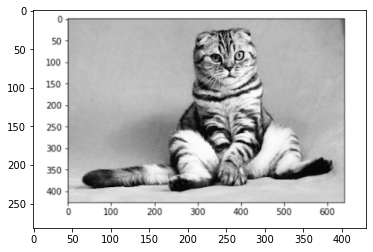

In [ ]:
plt.imshow(bgr_img,cmap=my_cmapa)
plt.show()

In [ ]:
gray_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)

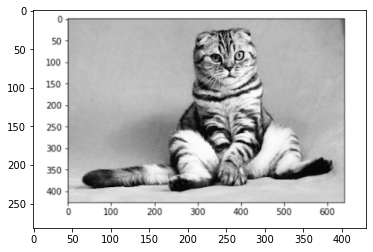

In [ ]:
plt.imshow(bgr_img,cmap='gray')
plt.show()

In [ ]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])


In [ ]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 3: \n', filter_3)

Filter 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
weight=torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
weight

tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

In [ ]:
class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    k_height, k_width = weight.shape[2:]
    self.conv = nn.Conv2d(1,4,kernel_size=(k_height,k_width),bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
  def forward(self,x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    return conv_x,activated_x
weight=torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [ ]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

RuntimeError: ignored

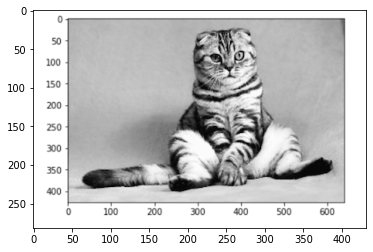

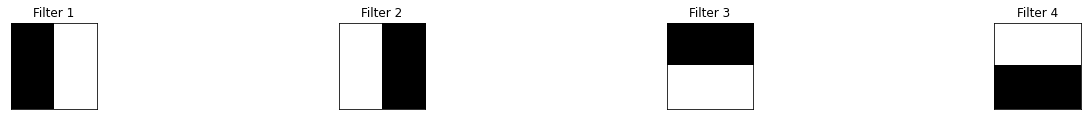

In [ ]:
# Plot original image
plt.imshow(gray_img, cmap='gray')
# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)
# Visualize the output of a convolutional layer
viz_layer(conv_layer)

In [ ]:
nn.Conv2d( )